<a href="https://colab.research.google.com/github/GrigArsen/House_Renting_Price/blob/master/Rent_market_project_on_data_on_March%2C_April%2C_May.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#pandas for data manipulation, transformation
import pandas as pd 

#visualization
import matplotlib.pyplot as plt 
import seaborn as sns #visualization

#for scientific computations
import numpy as np 
from numpy import nan

#for train and test split
from sklearn.model_selection import train_test_split 
#model building
import statsmodels.api as sm

#internal validity stastistical tests and plots
from statsmodels.api import qqplot #for qq plot
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow  #variance equality and linearity tests
from scipy.stats import shapiro #for checking normality
from statsmodels.stats.outliers_influence import variance_inflation_factor #for checking Multicolinearity
from sklearn.metrics import r2_score #R-squared
from sklearn.metrics import *

from collections import defaultdict

#libraries for modelling and evaluation
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error
from math import sqrt

from sklearn.ensemble import GradientBoostingClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree

In [102]:
url1='https://raw.githubusercontent.com/nunehovasafyan/House-Renting-Price/master/merged_03_2020_rent_price.csv'
data1=pd.read_csv(url1)
url2='https://raw.githubusercontent.com/nunehovasafyan/House-Renting-Price/master/merged_04_2020_rent_price.csv'
data2=pd.read_csv(url2)
url3='https://raw.githubusercontent.com/nunehovasafyan/House-Renting-Price/master/merged_05_2020_rent_price.csv'
data3=pd.read_csv(url3)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [103]:
data1['Month']='March'
data1

,Currency,Agency,Floor,Sqm,ID,nFloor,Broker,HTML_ID,Rooms,Price,Type,Source,District,City,Price_USD,price_per_sqm,Month
0,$,1.0,8.0,140.0,95330.0,13.0,գործակալություն,0,3.0,1700.0,Մոնոլիտ,my_realty,կենտրոն,Երևան,1700.000000,12.14,March
1,$,1.0,4.0,55.0,76281.0,5.0,գործակալություն,1,1.0,370.0,Քարե,my_realty,կենտրոն,Երևան,370.000000,6.73,March
2,$,1.0,6.0,63.0,64666.0,7.0,գործակալություն,2,2.0,480.0,Մոնոլիտ,my_realty,արաբկիր,Երևան,480.000000,7.62,March
3,$,1.0,7.0,100.0,82067.0,16.0,գործակալություն,3,2.0,1200.0,Պանելային,my_realty,կենտրոն,Երևան,1200.000000,12.00,March
4,$,1.0,14.0,97.0,76984.0,16.0,գործակալություն,4,3.0,800.0,Այլ,my_realty,կենտրոն,Երևան,800.000000,8.25,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40000,֏,1.0,5,40.0,8544704.0,6.0,NaN,26243,2.0,150000.0,Մոնոլիտ,list_am,0,երևան,312.116357,7.80,March
40001,$,1.0,7,50.0,10002802.0,9.0,NaN,26244,2.0,650.0,Մոնոլիտ,list_am,0,երևան,650.000000,13.00,March
40002,$,0.0,2,100.0,11847027.0,6.0,NaN,26245,3.0,600.0,Քարե,list_am,արաբկիր,երևան,600.000000,6.00,March
40003,$,1.0,2,40.0,13357406.0,4.0,NaN,26246,2.0,400.0,Քարե,list_am,արաբկիր,երևան,400.000000,10.00,March


In [104]:
data2['Month']='April'
data2

,Source,Rooms,City,ID,nFloor,Broker,District,Sqm,Currency,Agency,Price,HTML_ID,Type,Floor,Price_USD,price_per_sqm,Month
0,my_realty,3.0,Երևան,96482,9.0,գործակալություն,արաբկիր,82.0,$,1.0,370.0,0,Այլ,1,370.0,4.51,April
1,my_realty,2.0,Երևան,96479,11.0,գործակալություն,կենտրոն,50.0,$,1.0,450.0,1,Պանելային,4,450.0,9.00,April
2,my_realty,1.0,Երևան,96478,9.0,գործակալություն,կենտրոն,44.0,$,1.0,450.0,2,Պանելային,2,450.0,10.23,April
3,my_realty,2.0,Երևան,96477,5.0,գործակալություն,կենտրոն,40.0,$,1.0,360.0,3,Քարե,5,360.0,9.00,April
4,my_realty,2.0,Երևան,96476,14.0,գործակալություն,կենտրոն,54.0,$,1.0,400.0,4,Մոնոլիտ,11,400.0,7.41,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39579,list_am,4.0,երևան,11370586,12.0,NaN,0,140.0,$,1.0,1100.0,26244,Մոնոլիտ,9,1100.0,7.86,April
39580,list_am,3.0,երևան,9768648,9.0,NaN,կենտրոն,80.0,$,1.0,700.0,26245,Մոնոլիտ,3,700.0,8.75,April
39581,list_am,1.0,երևան,10554867,4.0,NaN,0,42.0,$,1.0,500.0,26246,Քարե,2,500.0,11.90,April
39582,list_am,1.0,երևան,12134756,3.0,NaN,կենտրոն,69.0,$,1.0,850.0,26247,Մոնոլիտ,3,850.0,12.32,April


In [105]:
data3['Month']='May'
data3

,Currency,Floor,Rooms,Type,Sqm,City,nFloor,HTML_ID,Source,Agency,ID,District,Broker,Price,Price_USD,price_per_sqm,Month
0,$,1.0,3.0,Քարե,100.0,Երևան,7.0,1,my_realty,1.0,97186.0,արաբկիր,գործակալություն,379.0,379.000000,3.79,May
1,$,4.0,3.0,Մոնոլիտ,130.0,Երևան,10.0,2,my_realty,1.0,97182.0,կենտրոն,գործակալ,900.0,900.000000,6.92,May
2,$,2.0,3.0,Մոնոլիտ,100.0,Երևան,10.0,3,my_realty,1.0,77379.0,կենտրոն,գործակալություն,1500.0,1500.000000,15.00,May
3,$,6.0,2.0,Մոնոլիտ,67.0,Երևան,14.0,4,my_realty,1.0,3552.0,արաբկիր,գործակալություն,600.0,600.000000,8.96,May
4,$,2.0,2.0,Պանելային,45.0,Երևան,12.0,5,my_realty,1.0,30544.0,կենտրոն,գործակալություն,550.0,550.000000,12.22,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40298,֏,3,3.0,Քարե,80.0,երևան,5.0,26245,list_am,1.0,10875916.0,0,NaN,190000.0,398.740818,4.98,May
40299,$,8,3.0,Քարե,100.0,երևան,8.0,26246,list_am,1.0,5975323.0,0,NaN,600.0,600.000000,6.00,May
40300,$,4,3.0,Քարե,85.0,երևան,7.0,26247,list_am,1.0,5896194.0,արաբկիր,NaN,400.0,400.000000,4.71,May
40301,$,10,2.0,Պանելային,70.0,երևան,10.0,26248,list_am,1.0,13248259.0,կենտրոն,NaN,450.0,450.000000,6.43,May


In [0]:
data=pd.concat([data1,data2,data3])

In [107]:
data

,Currency,Agency,Floor,Sqm,ID,nFloor,Broker,HTML_ID,Rooms,Price,Type,Source,District,City,Price_USD,price_per_sqm,Month
0,$,1.0,8.0,140.0,95330.0,13.0,գործակալություն,0,3.0,1700.0,Մոնոլիտ,my_realty,կենտրոն,Երևան,1700.000000,12.14,March
1,$,1.0,4.0,55.0,76281.0,5.0,գործակալություն,1,1.0,370.0,Քարե,my_realty,կենտրոն,Երևան,370.000000,6.73,March
2,$,1.0,6.0,63.0,64666.0,7.0,գործակալություն,2,2.0,480.0,Մոնոլիտ,my_realty,արաբկիր,Երևան,480.000000,7.62,March
3,$,1.0,7.0,100.0,82067.0,16.0,գործակալություն,3,2.0,1200.0,Պանելային,my_realty,կենտրոն,Երևան,1200.000000,12.00,March
4,$,1.0,14.0,97.0,76984.0,16.0,գործակալություն,4,3.0,800.0,Այլ,my_realty,կենտրոն,Երևան,800.000000,8.25,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40298,֏,1.0,3,80.0,10875916.0,5.0,NaN,26245,3.0,190000.0,Քարե,list_am,0,երևան,398.740818,4.98,May
40299,$,1.0,8,100.0,5975323.0,8.0,NaN,26246,3.0,600.0,Քարե,list_am,0,երևան,600.000000,6.00,May
40300,$,1.0,4,85.0,5896194.0,7.0,NaN,26247,3.0,400.0,Քարե,list_am,արաբկիր,երևան,400.000000,4.71,May
40301,$,1.0,10,70.0,13248259.0,10.0,NaN,26248,2.0,450.0,Պանելային,list_am,կենտրոն,երևան,450.000000,6.43,May


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119892 entries, 0 to 40302
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Currency       119892 non-null  object 
 1   Agency         119892 non-null  float64
 2   Floor          119890 non-null  object 
 3   Sqm            119892 non-null  float64
 4   ID             119892 non-null  float64
 5   nFloor         119890 non-null  float64
 6   Broker         51439 non-null   object 
 7   HTML_ID        119892 non-null  int64  
 8   Rooms          119891 non-null  float64
 9   Price          119892 non-null  float64
 10  Type           119885 non-null  object 
 11  Source         119892 non-null  object 
 12  District       119892 non-null  object 
 13  City           119892 non-null  object 
 14  Price_USD      119892 non-null  float64
 15  price_per_sqm  119892 non-null  float64
 16  Month          119892 non-null  object 
dtypes: float64(8), int64(1), objec

In [109]:
#checking number of duplicates, missing values and columns with a single value
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])

Duplicates: 0
Missing values: 68465
Single valued columns: Index([], dtype='object')


In [110]:
data.isna().sum()

Currency             0
Agency               0
Floor                2
Sqm                  0
ID                   0
nFloor               2
Broker           68453
HTML_ID              0
Rooms                1
Price                0
Type                 7
Source               0
District             0
City                 0
Price_USD            0
price_per_sqm        0
Month                0
dtype: int64

In [0]:
#droping "Broker", as it has many missing values
data=data.drop(["Broker"], axis=1)

In [112]:
# count the number of missing values for each column
num_missing = (data[["Rooms","nFloor","Type","Floor"]] == 0).sum()
# report the results
print(num_missing)

Rooms     3
nFloor    0
Type      0
Floor     0
dtype: int64


In [0]:
# replace '0' values with 'nan'
data[["Rooms","nFloor","Type","Floor"]] = data[["Rooms","nFloor","Type","Floor"]].replace(0, nan)
# drop rows with missing values
data.dropna(inplace=True)

In [114]:
print(data.nunique())

Currency             3
Agency               2
Floor               84
Sqm                224
ID               68376
nFloor              27
HTML_ID          25009
Rooms                7
Price              376
Type                 6
Source               3
District            15
City                 5
Price_USD          592
price_per_sqm     1623
Month                3
dtype: int64


In [0]:
# Dropping HTML_ID and ID because of many categories, price_sqm not useful
data = data.drop(['HTML_ID', 'ID', 'price_per_sqm'], axis=1)

In [116]:
data.Currency.value_counts()

$    92220
֏    27628
€       33
Name: Currency, dtype: int64

In [0]:
#In the dataset we have variable price and price USD, and for Currency variable we have 3 currencies
#We will drop the price and currency variables, and leave price USD for our predictions
data = data.drop(['Price', 'Currency'], axis=1)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119881 entries, 0 to 40302
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Agency     119881 non-null  float64
 1   Floor      119881 non-null  object 
 2   Sqm        119881 non-null  float64
 3   nFloor     119881 non-null  float64
 4   Rooms      119881 non-null  float64
 5   Type       119881 non-null  object 
 6   Source     119881 non-null  object 
 7   District   119881 non-null  object 
 8   City       119881 non-null  object 
 9   Price_USD  119881 non-null  float64
 10  Month      119881 non-null  object 
dtypes: float64(5), object(6)
memory usage: 11.0+ MB


In [119]:
#let's see categories and number of observations in each category for object variables
categorical_colnames=data.select_dtypes(include="object").columns
for colname in categorical_colnames:
    val_count=data[colname].value_counts()
    print(colname,"\n",val_count,"\n","\n")
    print("--------------------")

Floor 
 2.0       10362
3.0        9947
4.0        9420
5.0        6634
3          5354
          ...  
Նկուղ         3
0.0           3
0             2
21.0          1
20.0          1
Name: Floor, Length: 84, dtype: int64 
 

--------------------
Type 
 Քարե         49511
Մոնոլիտ      36611
Պանելային    27437
Այլ           6232
Կասետային       60
Աղյուսե         30
Name: Type, dtype: int64 
 

--------------------
Source 
 list_am        68451
real_estate    30490
my_realty      20940
Name: Source, dtype: int64 
 

--------------------
District 
 կենտրոն             67411
արաբկիր             27029
0                   12519
աջափնյակ             2619
դավթաշեն             1928
նորք                 1875
մալաթիա              1515
ավան                 1349
շենգավիթ             1329
քանաքեռ              1299
էրեբունի              434
քանաքեռ_զեյթուն       355
նոր_նորք              108
մալաթիա_սեբաստիա       82
այլ                    29
Name: District, dtype: int64 
 

--------------------
Cit

In [0]:
#As you can see, in the City variable there are 5 types all of which is Yerevan, but in different languages or upper/lower case differnces
#So as we know that we have only one city Yerevan, we will drop this variable
data = data.drop("City", axis=1)

In [121]:
#The type in Dicstrict with name 0, solving this issue
data=data[data["District"]!="0"]
data["District"].value_counts()

կենտրոն             67411
արաբկիր             27029
աջափնյակ             2619
դավթաշեն             1928
նորք                 1875
մալաթիա              1515
ավան                 1349
շենգավիթ             1329
քանաքեռ              1299
էրեբունի              434
քանաքեռ_զեյթուն       355
նոր_նորք              108
մալաթիա_սեբաստիա       82
այլ                    29
Name: District, dtype: int64

In [122]:
# summarize the shape of the data with missing rows, and not useful columns removed
print(data.shape)

(107362, 10)


In [123]:
#Floor - was categorical and written differently resulting in many categories, converting it to numeric
data['Floor']=np.where(data['Floor']=='Նկուղ ', 0, data['Floor'])
data['Floor']=data['Floor'].apply(lambda x:float(x))
data.Floor.value_counts()

2.0     18376
3.0     18080
4.0     16759
5.0     11666
6.0      7860
7.0      7020
1.0      6539
8.0      4968
9.0      4710
10.0     3328
11.0     2475
12.0     1831
13.0     1273
14.0     1108
15.0      573
17.0      330
16.0      314
18.0       70
19.0       37
20.0       36
0.0         8
21.0        1
Name: Floor, dtype: int64

In [124]:
data.head()

,Agency,Floor,Sqm,nFloor,Rooms,Type,Source,District,Price_USD,Month
0,1.0,8.0,140.0,13.0,3.0,Մոնոլիտ,my_realty,կենտրոն,1700.0,March
1,1.0,4.0,55.0,5.0,1.0,Քարե,my_realty,կենտրոն,370.0,March
2,1.0,6.0,63.0,7.0,2.0,Մոնոլիտ,my_realty,արաբկիր,480.0,March
3,1.0,7.0,100.0,16.0,2.0,Պանելային,my_realty,կենտրոն,1200.0,March
4,1.0,14.0,97.0,16.0,3.0,Այլ,my_realty,կենտրոն,800.0,March


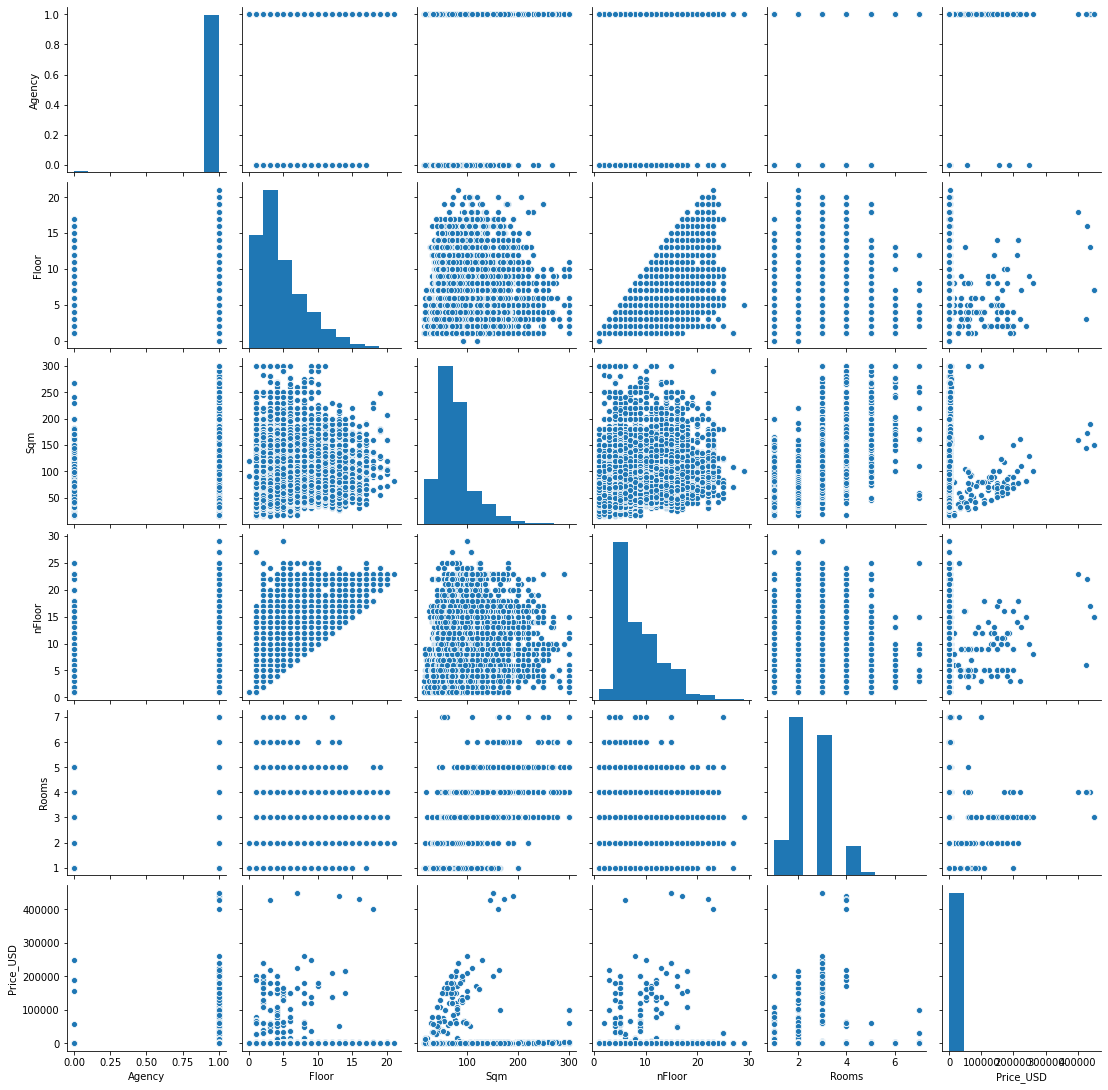

In [125]:
#To see the visual representation of pairwise relationships in a dataset, a pairplot is used. Note that it only plots numeric columns.
sns.pairplot(data)
plt.show()

In [126]:
#let's check for multicollinearity
data.corr()

,Agency,Floor,Sqm,nFloor,Rooms,Price_USD
Agency,1.000000,0.020288,0.031206,0.023987,0.025700,-0.006285
Floor,0.020288,1.000000,0.143874,0.671952,0.063480,0.023328
Sqm,0.031206,0.143874,1.000000,0.189596,0.769369,0.068624
nFloor,0.023987,0.671952,0.189596,1.000000,0.095605,0.033372
Rooms,0.025700,0.063480,0.769369,0.095605,1.000000,0.047121
Price_USD,-0.006285,0.023328,0.068624,0.033372,0.047121,1.000000


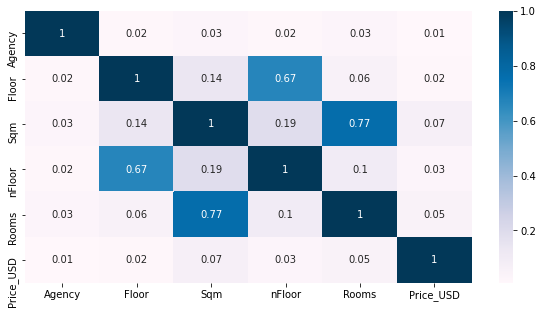

In [127]:
#in order to have a better representation, let's visualize the correlations
plt.figure(figsize=(10,5))
sns.heatmap(data.corr().abs().round(2),annot=True, cmap = "PuBu")
plt.show()

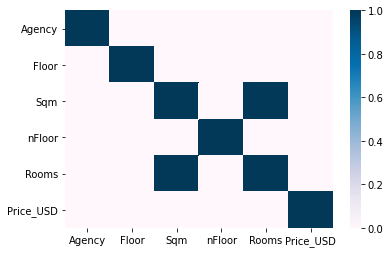

In [128]:
#plot correlation heatmap to see any correlations above or equal to 75% in absolute values
#we will see that number of variables are highly correlated, which will affect the results.
sns.heatmap(data.corr().abs()>=0.75, cmap = "PuBu")
plt.show()

In [129]:
#as we can see sqm correlates with the number of rooms, so we decided to exclude sqm, and add new variable called sqm_per_room_av = Sqm/Rooms
# add new column using square bracket notation
data['sqm_per_room_av'] = data['Sqm']/data['Rooms']
data = data.drop(['Sqm'], axis=1)
data.head()

,Agency,Floor,nFloor,Rooms,Type,Source,District,Price_USD,Month,sqm_per_room_av
0,1.0,8.0,13.0,3.0,Մոնոլիտ,my_realty,կենտրոն,1700.0,March,46.666667
1,1.0,4.0,5.0,1.0,Քարե,my_realty,կենտրոն,370.0,March,55.000000
2,1.0,6.0,7.0,2.0,Մոնոլիտ,my_realty,արաբկիր,480.0,March,31.500000
3,1.0,7.0,16.0,2.0,Պանելային,my_realty,կենտրոն,1200.0,March,50.000000
4,1.0,14.0,16.0,3.0,Այլ,my_realty,կենտրոն,800.0,March,32.333333


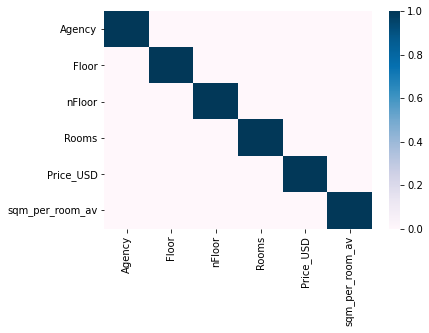

In [130]:
#lets check once again for multicollinearity, to be sure that our new variable does not correlate with Rooms
#plot correlation heatmap to see any correlations above or equal to 75% in absolute valuemmbmbbs
sns.heatmap(data.corr().abs()>=0.75, cmap = "PuBu")
plt.show()

## Descriptive Analytics

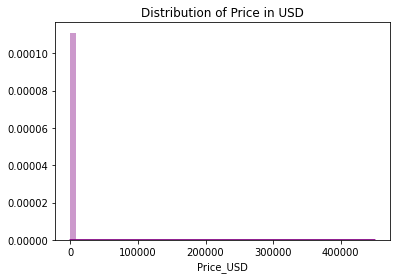

In [131]:
#let's visualise the distribution of price
sns.distplot(data.Price_USD,color="purple")
plt.title("Distribution of Price in USD")
plt.show()

As we can see, we have a right-skrewed distribution.

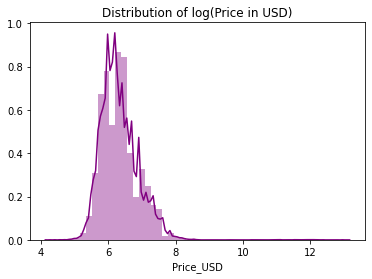

In [132]:
#Lets see what the log(price) distribution will look like
sns.distplot(np.log(data.Price_USD),color="purple")
plt.title("Distribution of log(Price in USD)")
plt.show()

Here, the distribution is more bell-shaped.

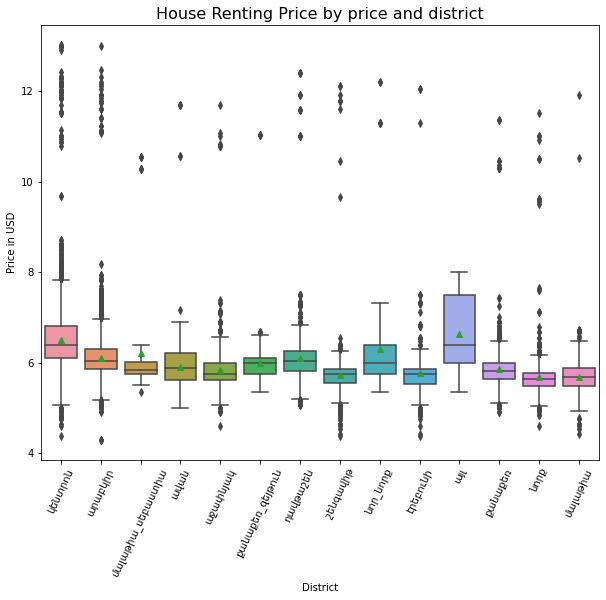

In [133]:
#Let's see the relationship of price and district
plt.figure(figsize=(10,8))
sns.boxplot(x="District", y=np.log(data["Price_USD"]), data=data, showmeans=True)
plt.xlabel("District")
plt.ylabel("Price in USD")
plt.xticks(rotation=65)
plt.title("House Renting Price by price and district",fontdict={"fontsize":16})
plt.show()

Kentron has the highest median and the biggest number of outliers, while other has no outliers but the median is pretty close to Kentron's.

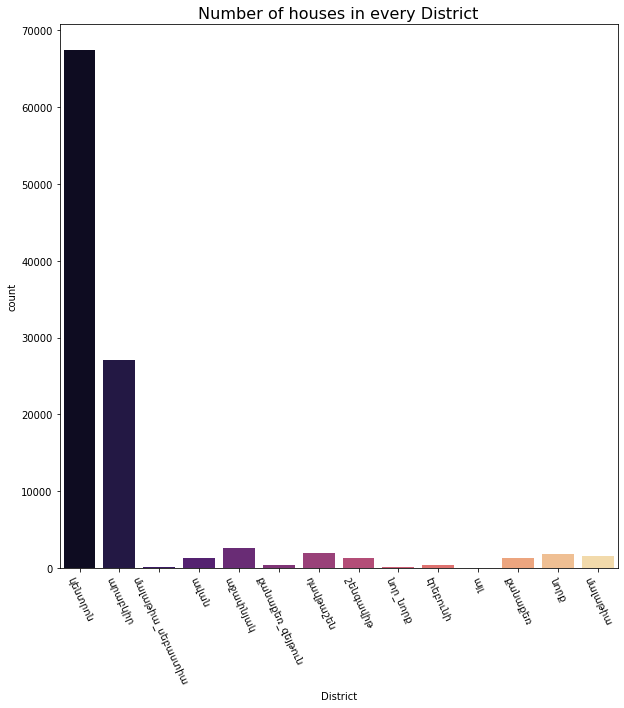

In [134]:
#let's see the Number of houses by district
plt.figure(figsize=(10,10))
cp=sns.countplot(x=data["District"], data=data, palette='magma', orient="h")
cp.set_xticklabels(cp.get_xticklabels(),rotation=-65)
plt.xlabel("District")
plt.title("Number of houses in every District",fontdict={"fontsize":16})
plt.show()

As we can see Kentron has the highest number of offerred houses for rent. Next comes Arabkir. Nor Nork and Malatia Sebastia have the lowest number of houses besided the category "Other".

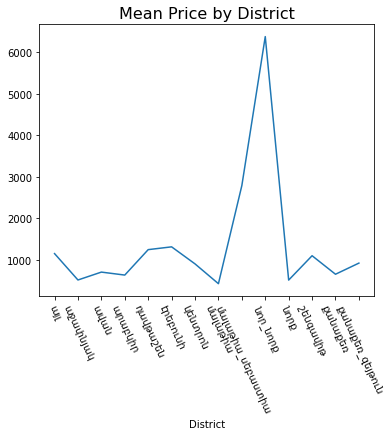

In [135]:
# Mean price by district
district_df = data.groupby(by='District').mean()

plt.figure(figsize=(6,5))
plt.plot(district_df.Price_USD)
plt.xlabel("District")
plt.xticks(rotation=-65)
plt.title("Mean Price by District",fontdict={"fontsize":16})
plt.show()

As we can see from the graph Shengavit and Malatia Sebastia have the lowest price for renting a house. 
Interestingly, Nor Nork has the highest price for renting.
This can be due to either renting not apartments but rather houses, like mansions, or having daily renting prices.

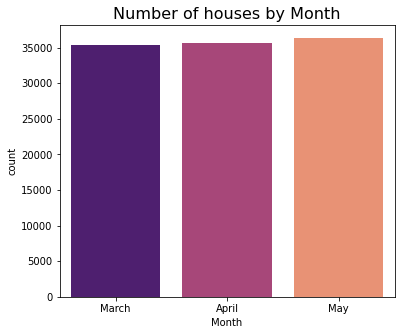

In [136]:
# number of houses by month
plt.figure(num=None, figsize=(6,5))
sns.countplot(x="Month",data=data, palette='magma')
plt.xlabel("Month")
plt.title("Number of houses by Month",fontdict={"fontsize":16})
plt.show()

As we can see there is not significant difference in the months, thus, no month is eye-catching in terms of number of houses offered for rent

In [0]:
# Let's see mean price of the houses by Month
monthly_df_mean = data.groupby(by='Month').mean()

# Let's see median price of the houses by Month
monthly_df_median = data.groupby(by='Month').median()

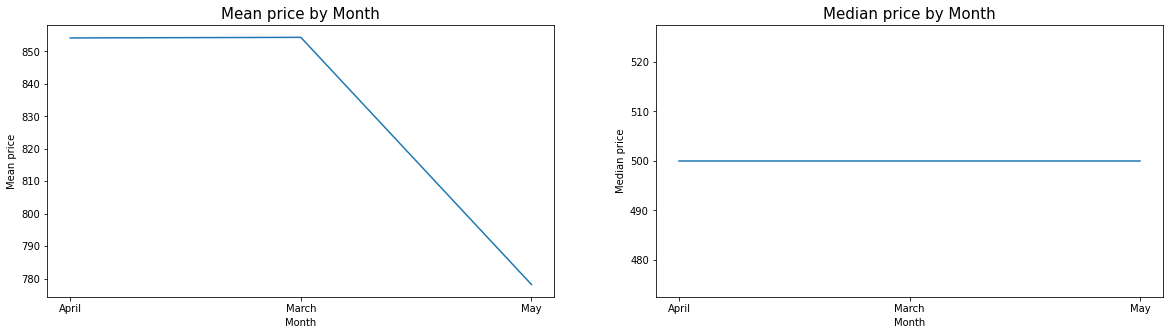

In [139]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.plot(monthly_df_mean.Price_USD)
plt.xlabel("Month")
plt.ylabel("Mean price")
plt.title('Mean price by Month', fontsize=15)

plt.subplot(1,2,2)
plt.plot(monthly_df_median.Price_USD)
plt.xlabel("Month")
plt.ylabel("Median price")
plt.title('Median price by Month', fontsize=15)
plt.show()

The graphs show that we have the mean price for March and April was the same but drastically dropped for May. However, the median price remained the same during three months.

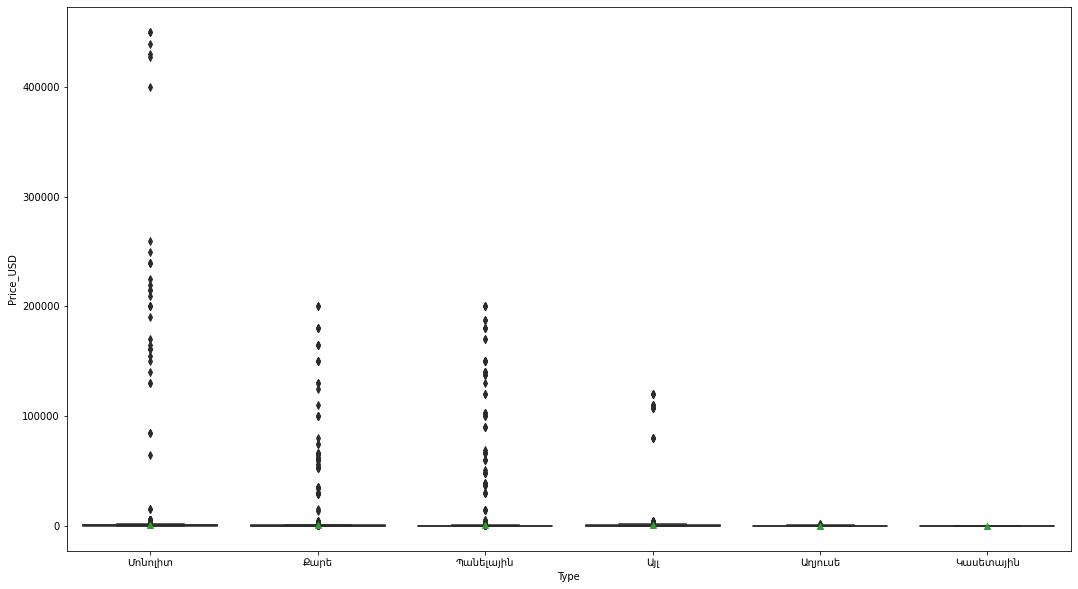

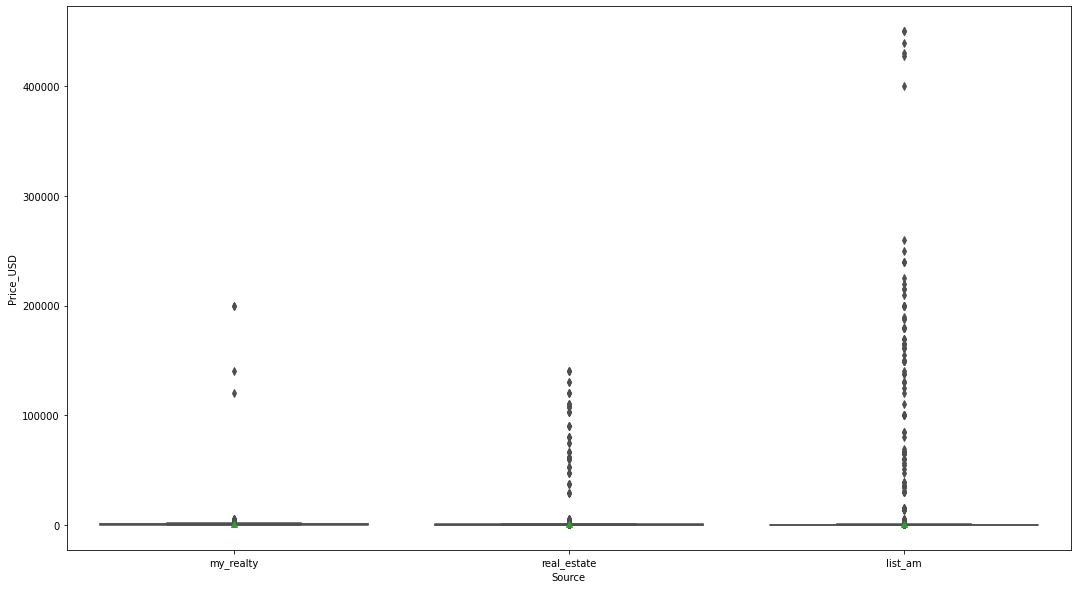

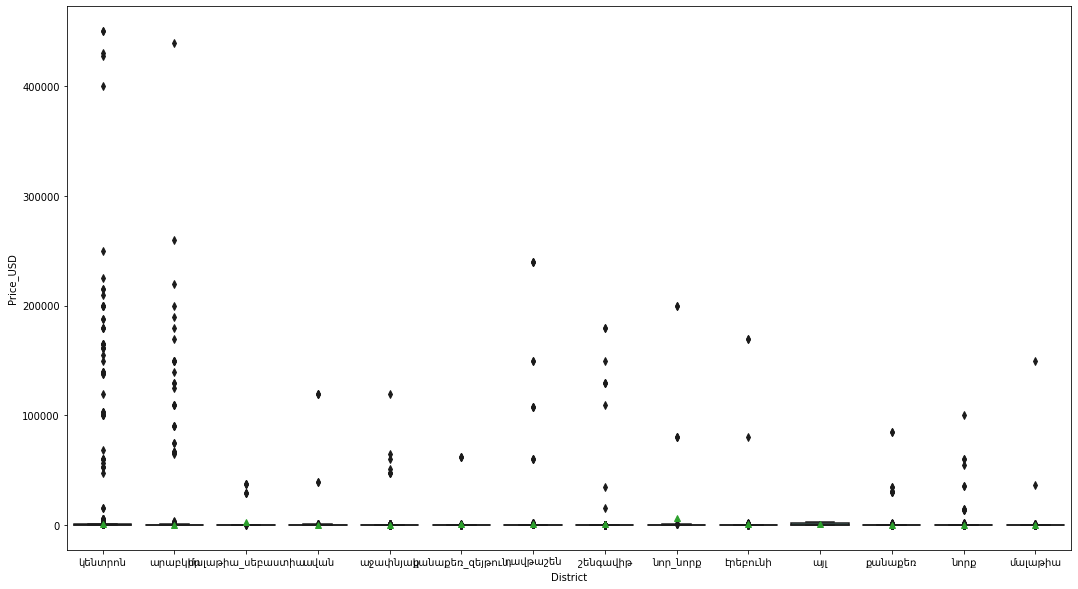

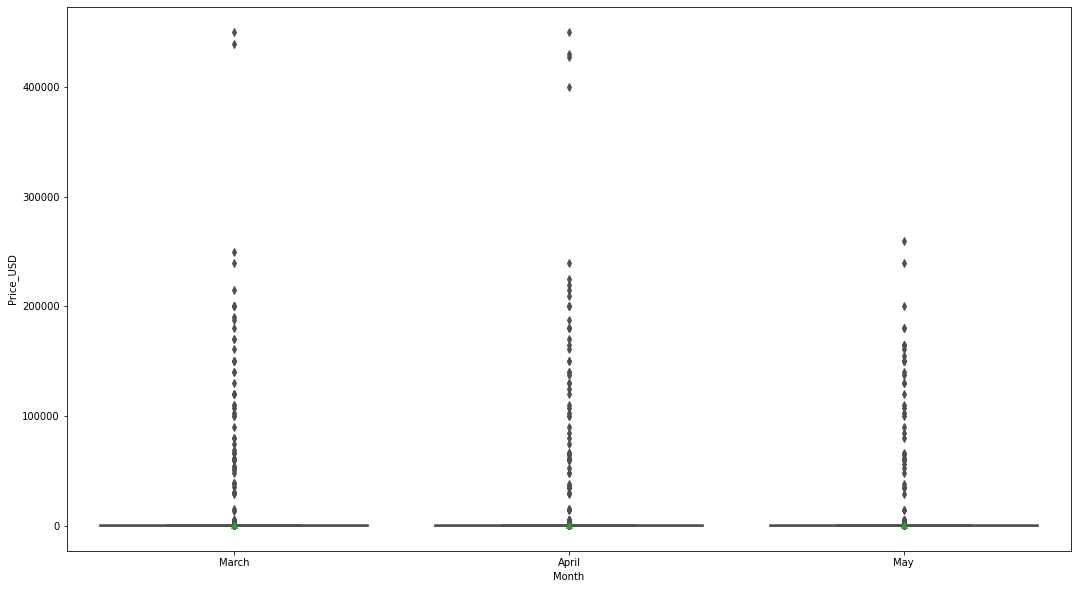

In [140]:
# Price USD with different categorical variables
for i in data.dtypes[data.dtypes=="O"].index.tolist():
    plt.figure(num=None, figsize=(18,10))
    sns.boxplot(data=data,x=i,y="Price_USD", palette='BrBG', showmeans=True)
    plt.show()

The medians for 3 different Sources are pretty much the same, however, my realty source has the fewest outliers. Then comes real estate. List am has the highest amount of outliers from Price.

When comparing Price_USD with different Districts, we found out that the district "other" has no outliers, this is pretty obvious, as this is generally the type that is not defined in other categories of the variable. Kanaker Zeitun, Malatia has the next fewest outliers. Kentron has the highest number of outliers. All of the medians are more or less in the same level.

When comparing Price_USD with different Types of houses, we found out that Kasetayin and Aghyuse types of houses have no outliers, "other" type has few of them. Panelayin, Qare and Monolit have the highest amount. The medians of all variables are also pretty much the same.

As we can see, the highest number of outliers are in the month April, while May has the lowest number.

## Linear Regression

In [141]:
#let's convert categorical variables in the dataset into dummy variables
data=pd.get_dummies(data,drop_first=True)
data.head()

,Agency,Floor,nFloor,Rooms,Price_USD,sqm_per_room_av,Type_Այլ,Type_Կասետային,Type_Մոնոլիտ,Type_Պանելային,Type_Քարե,Source_my_realty,Source_real_estate,District_աջափնյակ,District_ավան,District_արաբկիր,District_դավթաշեն,District_էրեբունի,District_կենտրոն,District_մալաթիա,District_մալաթիա_սեբաստիա,District_նոր_նորք,District_նորք,District_շենգավիթ,District_քանաքեռ,District_քանաքեռ_զեյթուն,Month_March,Month_May
0,1.0,8.0,13.0,3.0,1700.0,46.666667,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1.0,4.0,5.0,1.0,370.0,55.000000,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1.0,6.0,7.0,2.0,480.0,31.500000,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
3,1.0,7.0,16.0,2.0,1200.0,50.000000,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1.0,14.0,16.0,3.0,800.0,32.333333,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [0]:
Y=np.log(data["Price_USD"])
X=data.drop("Price_USD", axis=1)

In [0]:
#Splitting the data into train and test sets 0s are for train and 1s for test sets
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

In [0]:
model_linear= sm.OLS(Y0,sm.add_constant(X0))
#building the model
results=model_linear.fit()

In [145]:
#let's see the summary of the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_USD   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     3917.
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        20:55:32   Log-Likelihood:                -34945.
No. Observations:               80521   AIC:                         6.995e+04
Df Residuals:                   80493   BIC:                         7.021e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         4.8004      0.116     41.233      0.000       4.572       5.029
Agency                        0.0604      0.012      4.829      0.000       0.036       0.085
Floor                        -0.0002      0.001     -0.325      0.745      -0.001       0.001
nFloor                        0.0110      0.001     20.464      0.000       0.010       0.012
Rooms                         0.3214      0.002    191.384      0.000       0.318       0.325
sqm_per_room_av               0.0158      0.000    102.195      0.000       0.016       0.016
Type_Այլ                      0.0269      0.080      0.336      0.737      -0.130       0.184
Type_Կասետային               -0.0090      0.101     -0.090      0.929      -0.207       0.189
Type_Մոնոլիտ                  0.1753      0.080      2.196      0.028       0.019       0.332
Type_Պանելային               -0.1384      0.080     -1.735      0.083      -0.295       0.018
Type_Քարե                    -0.0111      0.080     -0.139      0.889      -0.168       0.145
Source_my_realty              0.1380      0.004     36.945      0.000       0.131       0.145
Source_real_estate            0.0246      0.003      7.545      0.000       0.018       0.031
District_աջափնյակ            -0.3230      0.084     -3.843      0.000      -0.488      -0.158
District_ավան                -0.4255      0.084     -5.038      0.000      -0.591      -0.260
District_արաբկիր             -0.1474      0.084     -1.761      0.078      -0.311       0.017
District_դավթաշեն            -0.2663      0.084     -3.163      0.002      -0.431      -0.101
District_էրեբունի            -0.3434      0.086     -3.988      0.000      -0.512      -0.175
District_կենտրոն              0.1602      0.084      1.915      0.055      -0.004       0.324
District_մալաթիա             -0.4452      0.084     -5.278      0.000      -0.611      -0.280
District_մալաթիա_սեբաստիա    -0.2275      0.097     -2.347      0.019      -0.418      -0.038
District_նոր_նորք            -0.0362      0.093     -0.389      0.697      -0.218       0.146
District_նորք                -0.4203      0.084     -4.989      0.000      -0.585      -0.255
District_շենգավիթ            -0.3589      0.084     -4.248      0.000      -0.524      -0.193
District_քանաքեռ             -0.3402      0.084     -4.028      0.000      -0.506      -0.175
District_քանաքեռ_զեյթուն     -0.2955      0.087     -3.402      0.001      -0.466      -0.125
Month_March                   0.0193      0.003      5.935      0.000       0.013       0.026
Month_May                     0.0093      0.003      2.904      0.004       0.003       0.016
==============================================================================
Omnibus:                    77846.940   Durbin-Watson:                   2.005
Prob(Omnibu

In [146]:
#Let's see the significant variables
results.pvalues[results.pvalues<=0.05]

const                         0.000000e+00
Agency                        1.376889e-06
nFloor                        7.826053e-93
Rooms                         0.000000e+00
sqm_per_room_av               0.000000e+00
Type_Մոնոլիտ                  2.811827e-02
Source_my_realty             2.721085e-296
Source_real_estate            4.584017e-14
District_աջափնյակ             1.216552e-04
District_ավան                 4.716221e-07
District_դավթաշեն             1.561383e-03
District_էրեբունի             6.672106e-05
District_մալաթիա              1.311879e-07
District_մալաթիա_սեբաստիա     1.891697e-02
District_նորք                 6.080306e-07
District_շենգավիթ             2.159464e-05
District_քանաքեռ              5.639884e-05
District_քանաքեռ_զեյթուն      6.688897e-04
Month_March                   2.957021e-09
Month_May                     3.689789e-03
dtype: float64

In [147]:
#not significant ones
results.pvalues[results.pvalues>0.05]

Floor                0.745146
Type_Այլ             0.736509
Type_Կասետային       0.928607
Type_Պանելային       0.082798
Type_Քարե            0.889159
District_արաբկիր     0.078175
District_կենտրոն     0.055435
District_նոր_նորք    0.696968
dtype: float64

In [0]:
Y0_linear=results.predict(sm.add_constant(X0))
Y1_linear=results.predict(sm.add_constant(X1))

In [149]:
MSE_train = mean_squared_error(Y0, Y0_linear)
MSE_test = mean_squared_error(Y1, Y1_linear)
print("MSE_train:", MSE_train)
print("MSE_test:", MSE_test)

MSE_train: 0.13947039704284936
MSE_test: 0.13902879154327072


In [150]:
RMSE_train = sqrt(MSE_train)
RMSE_test = sqrt(MSE_test)
print("RMSE_train:", RMSE_train)
print("RMSE_test:", RMSE_test)

RMSE_train: 0.37345735639139493
RMSE_test: 0.3728656481137284


In [151]:
#let's see r-squared for train and test sets for the model
print("R-squared Train:",r2_score(Y0,Y0_linear))
print("R-squared Test:",r2_score(Y1,Y1_linear))

R-squared Train: 0.5678543249021764
R-squared Test: 0.5729134865949432


Improving

In [0]:
Y0_second=Y0
X0_second=X0.drop(["Floor","Type_Կասետային","Type_Քարե"], axis=1)

In [0]:
results_1= sm.OLS(Y0_second,sm.add_constant(X0_second)).fit()

In [154]:
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Price_USD   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     4407.
Date:                Fri, 15 May 2020   Prob (F-statistic):               0.00
Time:                        20:56:07   Log-Likelihood:                -34945.
No. Observations:               80521   AIC:                         6.994e+04
Df Residuals:                   80496   BIC:                         7.017e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         4.7892      0.085     56.436      0.000       4.623       4.956
Agency                        0.0603      0.012      4.827      0.000       0.036       0.085
nFloor                        0.0109      0.000     23.664      0.000       0.010       0.012
Rooms                         0.3214      0.002    191.401      0.000       0.318       0.325
sqm_per_room_av               0.0158      0.000    102.211      0.000       0.015       0.016
Type_Այլ                      0.0380      0.006      5.984      0.000       0.026       0.051
Type_Մոնոլիտ                  0.1864      0.005     39.932      0.000       0.177       0.196
Type_Պանելային               -0.1273      0.004    -30.016      0.000      -0.136      -0.119
Source_my_realty              0.1380      0.004     36.945      0.000       0.131       0.145
Source_real_estate            0.0246      0.003      7.543      0.000       0.018       0.031
District_աջափնյակ            -0.3230      0.084     -3.844      0.000      -0.488      -0.158
District_ավան                -0.4255      0.084     -5.038      0.000      -0.591      -0.260
District_արաբկիր             -0.1474      0.084     -1.762      0.078      -0.311       0.017
District_դավթաշեն            -0.2664      0.084     -3.164      0.002      -0.431      -0.101
District_էրեբունի            -0.3434      0.086     -3.988      0.000      -0.512      -0.175
District_կենտրոն              0.1601      0.084      1.915      0.056      -0.004       0.324
District_մալաթիա             -0.4452      0.084     -5.277      0.000      -0.611      -0.280
District_մալաթիա_սեբաստիա    -0.2272      0.097     -2.344      0.019      -0.417      -0.037
District_նոր_նորք            -0.0363      0.093     -0.390      0.696      -0.219       0.146
District_նորք                -0.4202      0.084     -4.989      0.000      -0.585      -0.255
District_շենգավիթ            -0.3589      0.084     -4.248      0.000      -0.524      -0.193
District_քանաքեռ             -0.3401      0.084     -4.027      0.000      -0.506      -0.175
District_քանաքեռ_զեյթուն     -0.2955      0.087     -3.402      0.001      -0.466      -0.125
Month_March                   0.0193      0.003      5.934      0.000       0.013       0.026
Month_May                     0.0093      0.003      2.902      0.004       0.003       0.016
==============================================================================
Omnibus:                    77847.424   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12573594.872
Skew:                           4.286   Prob(JB):                         0.00
Kurtosis:                      63.615   Cond. No.                     8.12e+03
========================================================

In [0]:
Y1_second=Y1
X1_second=X1.drop(["Floor","Type_Կասետային","Type_Քարե"], axis=1)

In [0]:
Y0_linear_imp=results_1.predict(sm.add_constant(X0_second))
Y1_linear_imp=results_1.predict(sm.add_constant(X1_second))

In [157]:
MSE_train_imp = mean_squared_error(Y0_second, Y0_linear_imp)
MSE_test_imp = mean_squared_error(Y1_second, Y1_linear_imp)
print("MSE_train:", MSE_train_imp)
print("MSE_test:", MSE_test_imp)

MSE_train: 0.13947061569551306
MSE_test: 0.13902760420616872


In [158]:
RMSE_train_imp = sqrt(MSE_train_imp)
RMSE_test_imp = sqrt(MSE_test_imp)
print("RMSE_train:", RMSE_train_imp)
print("RMSE_test:", RMSE_test_imp)

RMSE_train: 0.3734576491324191
RMSE_test: 0.3728640559321436


In [159]:
#let's see r-squared for train and test sets for the initial model
print("R-squared Train:",r2_score(Y0_second,Y0_linear_imp))
print("R-squared Test:",r2_score(Y1_second,Y1_linear_imp))

R-squared Train: 0.56785364741215
R-squared Test: 0.5729171340096801


**Interpreting the results**



* **R-squared and F-statistics:** As Prob (F-statistic) is 0.00, it shows that our model is statistically significant at 5% significance level. This means that there is at least one estimated coefficient (besides intercept) that is not null. R-squared is not that big (56.8%). Thus, it shows that 56.8% of variance in log(Price_USD) is explained by the variables included in the model. 
* **Adj. R-squared:**As summary shows it's the same as R-squared, 56.8% which means that we have a very consistent model.  
* Statistically significant variables: Statistically significant are those variables, which have p-value *smaller or equal* to 0.05. Thus, all variables, except District_արաբկիր (p-value = 0.078), District_նոր_նորք (p-value = 0.696), District_կենտրոն (p-value = 0.056), are statistically significant.


*   **Coefficients (continuous variable):** Let's interpret for Rooms. For each unit increase in Rooms, we will experience on average about 0.3214 dollars increase in mean log(Price_USD) or 1 unit increase in Rooms leads to 100*0.3214=32.14% percent change in Price_USD. 
*   **Coefficients (categorical variable):** Let's interpret for District, subclass Kentron. If an apartment is located in Kentron rather than in "Other" district, then on average 0.1601 dollars increase is expected in mean log(Price_USD) or 16.01% percent change in Price_USD. If we take months, if an apartment was placed for rent in March rather than in April, then on average 0.0193 dollar increase is expected in log(Price_USD) or 1.93% percent change in Price_USD.





**Final Model**

log(Price_USD) = 4.7892	+ 0.0603 * Agency + 0.0109 * nFloor + 0.3214 * Rooms + 0.0158 * sqm_per_room_av + 0.0380 * Type_Այլ + 0.1864 * Type_Մոնոլիտ - 0.1273 * Type_Պանելային + 0.1380 * Source_my_realty + 0.0246 * Source_real_estate - 0.3230 * District_աջափնյակ - 0.4255 * District_ավան - 0.1474 * District_արաբկիր - 0.2664	* District_դավթաշեն - 0.3434 * District_էրեբունի + 0.1601 * District_կենտրոն - 0.4452 * District_մալաթիա - 0.2272 * District_մալաթիա_սեբաստիա - 0.0363 * District_նոր_նորք - 0.4202 * District_նորք - 0.3589 * District_շենգավիթ - 0.3401 * District_քանաքեռ - 0.2955 * District_քանաքեռ_զեյթուն + 0.0193 * Month_March + 0.0093 * Month_May


We've decided to take 1st and 3rd cases to see whether they are under or over priced.

**1st Case**
log(Price_USD) = 4.7892 + 0.0603 * 1 + 0.0109 * 5 + 0.3214 * 1 + 0.0158 * 55 + 0.0380 * 0 + 0.1864 * 0 - 0.1273 * 0 + 0.1380 * 1 + 0.0246 * 0 - 0.3230 * 0 - 0.4255 * 0 - 0.1474 * 0 - 0.2664 * 0 - 0.3434 * 0 + 0.1601 * 1 - 0.4452 * 0 - 0.2272 * 0 - 0.0363 * 0 - 0.4202 * 0 - 0.3589 * 0 - 0.3401 * 0 - 0.2955 * 0 + 0.0193 * 1 + 0.0093 * 0 = 6.4118 * 100 = 641.18 USD => The house was underpriced (370 USD)

**3rd Case**
log(Price_USD) = 4.7892 + 0.0603 * 1 + 0.0109 * 16 + 0.3214 * 2 + 0.0158 * 50 + 0.0380 * 0 + 0.1864 * 0 - 0.1273 * 1 + 0.1380 * 1 + 0.0246 * 0 - 0.3230 * 0 - 0.4255 * 0 - 0.1474 * 0 - 0.2664 * 0 - 0.3434 * 0 + 0.1601 * 1 - 0.4452 * 0 - 0.2272 * 0 - 0.0363 * 0 - 0.4202 * 0 - 0.3589 * 0 - 0.3401 * 0 - 0.2955 * 0 + 0.0193 * 1 + 0.0093 * 0 = 8.0715 * 100 = 807.15 USD => The house was overpriced (1200 USD)

We multiply our result by 100 as the equation is for log(Price_USD) not Price_USD


**Chechking LR assumptions using residual analysis (visual evidence)**

In [0]:
#To check the assumptions using residual analysis we will plot the fitted values vs error terms (residuals). 
#It should not exhibit any patterns (should be randomly distributed) to meet the Linearity, Normality and Independence assumptions.

In [161]:
#residuals of the model
residuals=results.resid
residuals.head(10)

38964   -0.205952
36277    0.216082
4105    -0.078906
7292    -0.018597
10014   -0.303223
32732   -0.718993
10889   -0.107598
33049    0.052145
7546     0.129516
39266    0.055087
dtype: float64

In [0]:
#let's actually get residual values
#first, we need to get predicted values from the results of the model
#second, we should calculate the difference between predicted and true values of cons. conf. index
predicted_values=results.predict()

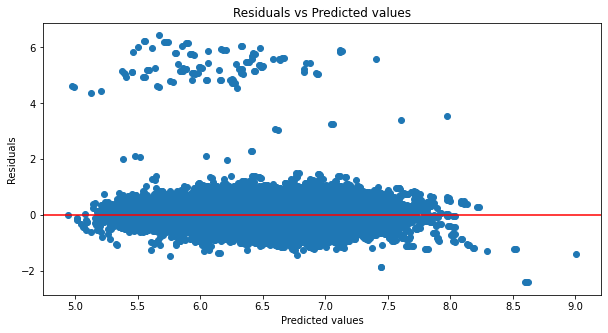

In [163]:
#lets plot predicted values vs residuals
plt.figure(figsize=(10,5))
plt.scatter(predicted_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residuals vs Predicted values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

As we can see, there is no specific pattern, however many outliers and residuals are focused in one area. In order to make right decisions,  the visual evidence in this case is not enough to make conclusions.

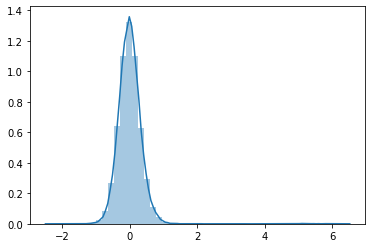

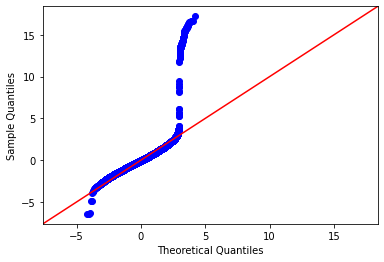

In [164]:
#Normality
#visual presentation- histogram
sns.distplot(residuals)
plt.show()

#QQ plot
qqplot(residuals,fit=True, line='45')
plt.show()

The residuals distribution plot shows that the distribution is pretty much bell-shaped, so based on the plot only we can say that the normality assumption is held. 
QQ-plot shows that the there are many outliers, the graph start with few outliers below the line, then for some period the dots are on the line, however, in the end, they are above the line.

**Diagnostic Tests for LINE Assumptions**

In [165]:
#Linearity 
#The null hypothesis assumes that the regression is correctly modelled as linear
rnames=["fstat", "p-value"]
rainbow=linear_rainbow(results)
print(list(zip(rnames, rainbow)))

[('fstat', 1.0579831773803736), ('p-value', 7.867340295541984e-09)]


As we have a small p-value, the linearity assumption is not held.

In [0]:
#Independence

As we have checked above, there is no multicollinearity between the variables, because we removed the ones that were creating multicollinearity problem.

In [167]:
#Shapiro-Wilk normality test. 
#The null-hypothesis of this test is that the data was drawn from a normal distribution
snames=['The test statistic', 'p-value']
shapirotest=shapiro(residuals)
print(list(zip(snames, shapirotest)))

[('The test statistic', 0.8076894879341125), ('p-value', 0.0)]


/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Test confirms that the data was not drawn from a normal distribution, as p-value<threshold

In [168]:
#Breusch-Pagan test for equality (homoscedasticity)
#The null hypothesis assumes homoskedasticity
bnames = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breush = het_breuschpagan(residuals, results.model.exog)
print(list(zip(bnames, breush)))

[('Lagrange multiplier statistic', 549.4334109620933), ('p-value', 9.228406638914792e-99), ('f-value', 20.482068368235144), ('f p-value', 3.951267036609565e-99)]


We reject the null hypothesis based on 5% significance level, thus homoscedasticity assumption is not hold. p-value is significantly smaller than our significance level threshold.

##Decision Tree

In [0]:
param_dt = {"max_depth":range(1,15),"min_samples_leaf":range(10,125,5)}

In [0]:
#Cross-Validated Gridsearch 
gs_dt = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_dt,cv=3, scoring="neg_mean_squared_error")
gs_dt.fit(X0_second, Y0_second)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 15),
                         'min_samples_leaf': range(10, 125, 5)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
         

In [0]:
#Seeing the best parameters
gs_dt.best_params_

{'max_depth': 14, 'min_samples_leaf': 20}

In [0]:
#fitting the model with best parameters
dt_grid = DecisionTreeRegressor(max_depth=14,
                             min_samples_leaf=10, random_state=42).fit(X0_second, Y0_second)

In [0]:
#getting probabilities
Y0_dt_grid = dt_grid.predict(X0_second)
Y1_dt_grid = dt_grid.predict(X1_second)

In [0]:
#MSE for DT
MSE_train_dt_grid = mean_squared_error(Y0_second, Y0_dt_grid)
MSE_test_dt_grid = mean_squared_error(Y1_second, Y1_dt_grid)
print("MSE_train_dt:", MSE_train_dt_grid)
print("MSE_test_dt:", MSE_test_dt_grid)

MSE_train_dt: 0.10497903785122663
MSE_test_dt: 0.11928737127470451


In [0]:
#RMSE for DT
RMSE_train_dt_grid = sqrt(MSE_train_dt_grid)
RMSE_test_dt_grid = sqrt(MSE_test_dt_grid)
print("RMSE_train_dt:", RMSE_train_dt_grid)
print("RMSE_test_dt:", RMSE_test_dt_grid)

RMSE_train_dt: 0.3240046880081006
RMSE_test_dt: 0.34538003890599195


In [0]:
#let's see r-squared for train and test sets for the model
print("R-squared Train:", r2_score(Y0_second, Y0_dt_grid))
print("R-squared Test:", r2_score(Y1_second, Y1_dt_grid))

R-squared Train: 0.6747249728600078
R-squared Test: 0.6335577190490658


##Random Forest

In [0]:
param_gf = {"max_depth":range(1,15),"min_samples_leaf":range(10,125,5)}

In [0]:
#Cross-Validated Gridsearch 
gs_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_dt,cv=3, scoring="neg_mean_squared_error")
gs_rf.fit(X0_second, Y0_second)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [0]:
#Seeing the best parameters
gs_rf.best_params_

{'max_depth': 14, 'min_samples_leaf': 10}

In [0]:
#fitting the model with best parameters
rf_grid=RandomForestRegressor(max_depth=14, min_samples_leaf=10, random_state=42).fit(X0_second,Y0_second)

In [0]:
#getting probabilities
Y0_rf_grid=rf_grid.predict(X0_second)
Y1_rf_grid=rf_grid.predict(X1_second)

In [0]:
#MSE for RF
MSE_train_rf_grid = mean_squared_error(Y0_second, Y0_rf_grid)
MSE_test_rf_grid = mean_squared_error(Y1_second, Y1_rf_grid)
print("MSE_train_rf:", MSE_train_rf_grid)
print("MSE_test_rf:", MSE_test_rf_grid)

MSE_train_rf: 0.1027494664568522
MSE_test_rf: 0.11448767385889673


In [0]:
#RMSE for RF
RMSE_train_rf_grid = sqrt(MSE_train_rf_grid)
RMSE_test_rf_grid = sqrt(MSE_test_rf_grid)
print("RMSE_train_rf:", RMSE_train_rf_grid)
print("RMSE_test_rf:", RMSE_test_rf_grid)

RMSE_train_rf: 0.3205455762553154
RMSE_test_rf: 0.33836027228221804


In [0]:
#let's see r-squared for train and test sets for the model
print("R-squared Train:", r2_score(Y0_second, Y0_rf_grid))
print("R-squared Test:", r2_score(Y1_second, Y1_rf_grid))

R-squared Train: 0.6816332462702047
R-squared Test: 0.6483020465510322


###Gradient Boosting

In [0]:
param_gb = {"max_depth":range(1,15),"min_samples_leaf":range(10,125,5)}

In [0]:
#Cross-Validated Gridsearch 
gs_gb = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_gb,cv=3, scoring="neg_mean_squared_error")
gs_gb.fit(X0_second, Y0_second)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [0]:
#Seeing the best parameters
gs_gb.best_params_

{'max_depth': 14, 'min_samples_leaf': 10}

In [0]:
#fitting the model with best parameters
gb_grid=GradientBoostingRegressor(max_depth=14,
                             min_samples_leaf=10, random_state=42).fit(X0_second, Y0_second)

In [0]:
#getting probabilities
Y0_gb_grid = gb_grid.predict(X0_second)
Y1_gb_grid = gb_grid.predict(X1_second)

In [0]:
#MSE for GB
MSE_train_gb_grid = mean_squared_error(Y0_second, Y0_gb_grid)
MSE_test_gb_grid = mean_squared_error(Y1_second, Y1_gb_grid)
print("MSE_train_gb:", MSE_train_gb_grid)
print("MSE_test_gb:", MSE_test_gb_grid)

MSE_train_gb: 0.07965335436460368
MSE_test_gb: 0.10585205702470872


In [0]:
#RMSE for GB
RMSE_train_gb_grid = sqrt(MSE_train_gb_grid)
RMSE_test_gb_grid = sqrt(MSE_test_gb_grid)
print("RMSE_train_gb:", RMSE_train_gb_grid)
print("RMSE_test_gb:", RMSE_test_gb_grid)

RMSE_train_gb: 0.28222925851974257
RMSE_test_gb: 0.3253491309727271


In [0]:
#let's see r-squared for train and test sets for the initial model
print("R-squared Train:", r2_score(Y0_second, Y0_gb_grid))
print("R-squared Test:", r2_score(Y1_second, Y1_gb_grid))

R-squared Train: 0.7531959948094044
R-squared Test: 0.6748300444130253


In [0]:
# feature importances of gradient boosting regression
feat_imp=pd.DataFrame(gb_grid.feature_importances_,index=X0_second.columns,
                      columns=["Feature_imp"])
feat_imp=feat_imp.sort_values(by="Feature_imp",ascending=False)
feat_imp.head()

,Feature_imp
sqm_per_room_av,0.323912
Rooms,0.283725
District_կենտրոն,0.163316
nFloor,0.081577
Type_Մոնոլիտ,0.064639


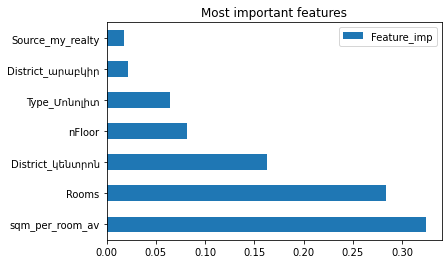

In [0]:
# visualizing feature importances
feat_imp.head(7).plot.barh()
plt.title("Most important features")
plt.show()